<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/16May20_1_sklearn_dtrees_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees Lab

## Introduction

In this lesson, we'll begin using our decision tree algorithm to make predictions of movie revenue.  To do so, we'll use our IMDB dataset.

### Exploring our data

Let's start by loading our data.

In [1]:
import pandas as pd
movies_df = pd.read_csv('https://raw.githubusercontent.com/jigsawlabs-student/decision-trees-intro/master/3-practical-ds-4/imdb_movies.csv')
movies_df[:5]

,title,genre,budget,runtime,year,month,revenue
0,Avatar,Action,237000000,162.0,2009,12,2787965087
1,Pirates of the Caribbean: At World's End,Adventure,300000000,169.0,2007,5,961000000
2,Spectre,Action,245000000,148.0,2015,10,880674609
3,The Dark Knight Rises,Action,250000000,165.0,2012,7,1084939099
4,John Carter,Action,260000000,132.0,2012,3,284139100


Now let's use  `genre`, `budget`, `runtime`, `year`, and `month` as our features, and `revenue` as our target.  

Assign the `genre`, `budget`, `runtime`, `year` and `month` columns to the variable `X`.

In [0]:
feature_columns = ['genre', 'budget', 'runtime', 'year', 'month']
X = movies_df[feature_columns]

In [4]:
X[:3]

# 	genre	budget	runtime	year	month
# 0	Action	237000000	162.0	2009	12
# 1	Adventure	300000000	169.0	2007	5
# 2	Action	245000000	148.0	2015	10

,genre,budget,runtime,year,month
0,Action,237000000,162.0,2009,12
1,Adventure,300000000,169.0,2007,5
2,Action,245000000,148.0,2015,10


And assign revenue to the variable `y`.

In [0]:
y = movies_df.revenue

In [6]:
y[:2]
# 0    2787965087
# 1     961000000
# Name: revenue, dtype: int64

0    2787965087
1     961000000
Name: revenue, dtype: int64

### Changing the data

Now currently the `genre` column is of type `object`. Let's use our LabelEncoder and DataFrameMapper to change it. 

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([
    (['genre'], [SimpleImputer(strategy='constant', fill_value='other'), LabelEncoder()])
],df_out=True, default = None)


Use the mapper to transform the genre column, and save the result as `transformed_genre`.

In [33]:
transformed_genre = mapper.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
transformed_genre[:5]


# genre
# 0	0
# 1	1
# 2	0
# 3	0
# 4	0

,genre,budget,runtime,year,month
0,0,237000000.0,162.0,2009.0,12.0
1,1,300000000.0,169.0,2007.0,5.0
2,0,245000000.0,148.0,2015.0,10.0
3,0,250000000.0,165.0,2012.0,7.0
4,0,260000000.0,132.0,2012.0,3.0


In [35]:
transformed_genre.dtypes

genre        int64
budget     float64
runtime    float64
year       float64
month      float64
dtype: object

Now if we want to see what genres were turned into what numbers we can do so with by selecting the labelencoder from our mapper, and then checking the `classes_` attribute.  Let's do it.  Begin by looking at the features of the model.

In [36]:
mapper.features

# [(['genre'],
#   [SimpleImputer(add_indicator=False, copy=True, fill_value='na',
#                  missing_values=nan, strategy='constant', verbose=0),
#    LabelEncoder()])]

[(['genre'], [SimpleImputer(add_indicator=False, copy=True, fill_value='other',
                 missing_values=nan, strategy='constant', verbose=0),
   LabelEncoder()])]

Now select the label encoder from the features.

In [37]:
encoder = mapper.features[-1][-1][-1]
encoder
# LabelEncoder()

LabelEncoder()

Finally, look at the encoder's classes.

In [38]:
encoder.classes_

# array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
#        'Fantasy', 'Horror', 'Romance', 'Science Fiction', 'Thriller',
#        'na'], dtype=object)

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
       'Fantasy', 'Horror', 'Romance', 'Science Fiction', 'Thriller',
       'other'], dtype=object)

We can then zip them together with a list of indices to create a dictionary telling us how to translate the column.

In [39]:
import numpy as np
idcs = np.arange(0, len(encoder.classes_))
dict(zip(idcs, encoder.classes_))

{0: 'Action',
 1: 'Adventure',
 2: 'Animation',
 3: 'Comedy',
 4: 'Crime',
 5: 'Drama',
 6: 'Fantasy',
 7: 'Horror',
 8: 'Romance',
 9: 'Science Fiction',
 10: 'Thriller',
 11: 'other'}

### Training the Model

Ok, now let's load up a `DecisionTreeRegressor`.  

We use a DecisionTreeRegressor (as opposed to a DecisionTreeClassifier) because the revenue data is not just a $1$ or $0$, but potentially any value greater than 0.  So we have a regression problem.

In [0]:
# Load DecisionTreeRegressor from the tree module here
from sklearn.tree import DecisionTreeRegressor

Now follow the steps training a model.  Initialize our `DecisionTreeRegressor` and then fit the model.

In [0]:
model = DecisionTreeRegressor()

In [44]:
model.fit(transformed_genre, y)
# DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
#                       max_leaf_nodes=None, min_impurity_decrease=0.0,
#                       min_impurity_split=None, min_samples_leaf=1,
#                       min_samples_split=2, min_weight_fraction_leaf=0.0,
#                       presort=False, random_state=None, splitter='best')

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

And finally, we can make a prediction, by passing through the features of an observation.

> Use the model to make the first prediction below.

In [48]:
first_observation = transformed_genre[:1]
model.predict(first_observation)
# predict first observation

# array([2.78796509e+09])

array([2.78796509e+09])

We can also see the hypothesis function for our model.

> Note that we pass through our `model`, `feature_names`, and the depth we wish to display.

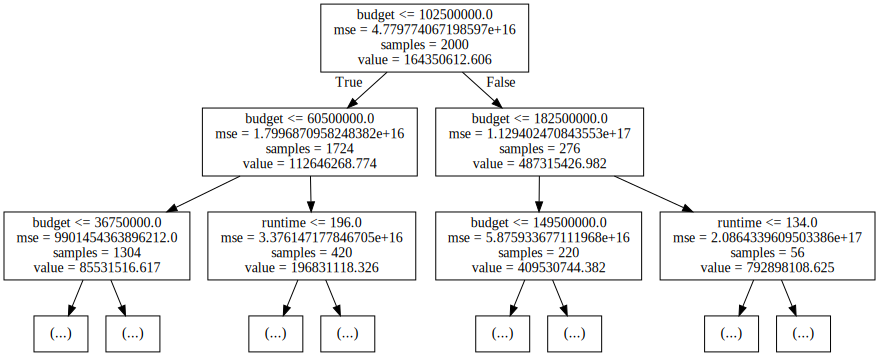

In [49]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 

Source(tree.export_graphviz(model, out_file = None, feature_names=X.columns, max_depth = 2))

Let's interpret diagram above.  The `value` on the first node at the top, is the average revenue for all movies - `164350612` (at the bottom of the node).  The best split point for all of the data is the budget.  And then at the next level, we again split by the budget.

In the third level, we see runtime show up as feature.  

The decision tree continues beyond the image, but we only printed out three levels.  A complete mapping of the numbers to genres is provided below.  

### Summary

In this lesson, we saw how to format our data, then train and make predictions with our decision tree algorithm.  We formatted our data by using the LabelEncoder which transforms our each category in a categorical feature to a corresponding number, which our decision tree can then split on.  We then chose the DecisionTreeRegressor as our target is not a category but a number, and then fit a model and made our predictions.  

<center>
<a href="https://www.jigsawlabs.io/free" style="position: center"><img src="https://storage.cloud.google.com/curriculum-assets/curriculum-assets.nosync/mom-files/jigsaw-labs.png" width="15%" style="text-align: center"></a>
</center>